In [ ]:
import torch
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1
torch.cuda.device_count()

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
torch.cuda.device_count()

In [ ]:
!CUDA_VISIBLE_DEVICES=1
torch.cuda.device_count()

In [ ]:
%set_env CUDA_VISIBLE_DEVICES=1
torch.cuda.device_count()

In [ ]:
# The only way to do it is to launch jupyter this way:

import torch
torch.cuda.device_count()

In [ ]:
torch.cuda.get_device_name()

In [ ]:
if torch.cuda.is_available():
    torch.cuda.set_device(2)

In [1]:
experimentsPath = "/raid/elhamod/CIFAR_HGNN/experiments/" #"/raid/elhamod/Fish/experiments/"
dataPath = "/raid/elhamod/" #"/raid/elhamod/Fish/"
experimentName = "CIFAR_phylogeny_tripletloss_new_archi_full"
i=0
device = 0
experiment_params = {"image_path": "cifar-100-python", "suffix": None, "img_res": 32, "augmented": True, "batchSize": 64, "learning_rate": 0.01, "numOfTrials": 2, "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12, "optimizer": "adabelief", "scheduler": "cosine", "weightdecay": 0.0005, "modelType": "BB", "lambda": 10, "tl_model": "preResNet", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": True, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.3, "phylogeny_loss": False, "displayName": "CIFARpretrained4-Triplet-Cos", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}




# experiment_params = {"image_path": "cifar-100-python", "suffix": None, "img_res": 32, "augmented": True, "batchSize": 64, "learning_rate": 0.001, "numOfTrials": 1, "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12, "optimizer": "adabelief", "scheduler": "plateau", "weightdecay": 0.0005, "modelType": "BB", "lambda": 10, "tl_model": "preResNet", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": False, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.2, "phylogeny_loss": False, "displayName": "CIFARpretrained4-BB", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from myhelpers import cifar_dataLoader
from HGNN.train import CNN
from HGNN.train.configParser import getModelName
from configParser import ConfigParser, getModelName
import os
import torch
from myhelpers.resnet_cifar2 import cifar100
import numpy as np
from myhelpers.preresnet_cifar import resnet as preresnet_cifar
import random
# def seed_everything(seed):
#     random.seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True
    
# seed_everything(121)

config_parser = ConfigParser(experimentsPath, dataPath, experimentName)
experiment_params = config_parser.fixExperimentParams(experiment_params)
experimentPathAndName = os.path.join(experimentsPath, experimentName)
datasetManager = cifar_dataLoader.datasetManager(experimentPathAndName, dataPath)
datasetManager.updateParams(config_parser.fixPaths(experiment_params))

train_loader, validation_loader, test_loader = datasetManager.getLoaders()
architecture = {
    "fine": len(train_loader.dataset.csv_processor.getFineList()),
    "coarse" : len(train_loader.dataset.csv_processor.getCoarseList())
}

# from myhelpers.resnet_cifar import cifar_resnet56

# # modelName = getModelName(experiment_params, i)
# print(modelName)
# modelName = "models/b07640aa2d0c1aacb31f7bcda75ac772ad8bf53db3dacc06d2280a98"
# trialName = os.path.join(experimentPathAndName, modelName)
# # initModelPath = CNN.getInitModelFile(experimentPathAndName)
# finalModelPath = CNN.getModelFile(trialName)
# model.load_state_dict(torch.load(finalModelPath))

# model = cifar_resnet56(pretrained='cifar100')
model = CNN.create_model(architecture, experiment_params, device=device)
# model = cifar100(128, pretrained=True)
# model = preresnet_cifar(dataset='cifar100', inpt_size=32, pretrained=True)
# CNN.trainModel(train_loader, validation_loader, experiment_params, model, "hello", test_loader, device=device)
# print(model)

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))

# with torch.no_grad():
#     rand_input = torch.rand(2, 3, model.network_fine.img_res, model.network_fine.img_res)
#     if model.network_fine.device is not None:
#         rand_input = rand_input.cuda()
#     out_ = model.network_fine(rand_input)

model = CNN.create_model(architecture, experiment_params, device=device)

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))


model = model.network_fine

predlist, lbllist = CNN.getLoaderPredictionProbabilities(test_loader, model, experiment_params, device=device)
predlist, lbllist = CNN.getPredictions(predlist, lbllist)
if device is not None:
    predlist = predlist.cpu()
    lbllist = lbllist.cpu()   
print(f1_score(lbllist, predlist, average='macro'))
print(f1_score(lbllist, predlist, average='micro'))
print(accuracy_score(lbllist, predlist))






Creating dataset...
Loading dataset...
/raid/elhamod/cifar-100-python/
Files already downloaded and verified
CIFAR normalization
Loading dataset...
/raid/elhamod/cifar-100-python/
Files already downloaded and verified
CIFAR normalization
Creating dataset... Done.
Loading saved indices...
Creating loaders...
Creating loaders... Done.
layer4 not found
0.7520963670629908
0.7514
0.7514
layer4 not found
0.7520963670629908
0.7514
0.7514


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


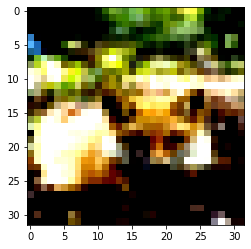

In [2]:
images = next(iter(train_loader))
plt.imshow(np.transpose(images['image'][0].cpu().detach().numpy(), (1, 2, 0)))

In [16]:
import torch
import torchvision.models as models
learning_rate = 0.00001
scheduler_gamma = 0.1
scheduler_patience = 4
epochs = 40

model = models.resnet50(pretrained=True)
optimizer = torch.optim.Adam(model.parameters(), learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, scheduler_patience, eta_min=learning_rate*scheduler_gamma)

for i in range(epochs):
    print(scheduler.get_last_lr())
    scheduler.step() 


[1e-05]
[8.681980515339464e-06]
[5.5e-06]
[2.3180194846605362e-06]
[1.0000000000000002e-06]
[2.3180194846605362e-06]
[5.5000000000000016e-06]
[8.681980515339468e-06]
[1.0000000000000004e-05]
[8.681980515339468e-06]
[5.500000000000003e-06]
[2.3180194846605405e-06]
[1.0000000000000002e-06]
[2.3180194846605362e-06]
[5.499999999999991e-06]
[8.681980515339447e-06]
[9.999999999999986e-06]
[8.68198051533945e-06]
[5.499999999999995e-06]
[2.3180194846605388e-06]
[1.0000000000000002e-06]
[2.3180194846605362e-06]
[5.499999999999986e-06]
[8.681980515339454e-06]
[9.999999999999994e-06]
[8.68198051533946e-06]
[5.499999999999993e-06]
[2.3180194846605405e-06]
[1.0000000000000002e-06]
[2.3180194846605362e-06]
[5.499999999999988e-06]
[8.681980515339456e-06]
[9.999999999999997e-06]
[8.681980515339461e-06]
[5.499999999999995e-06]
[2.318019484660542e-06]
[1.0000000000000002e-06]
[2.3180194846605362e-06]
[5.49999999999999e-06]
[8.681980515339461e-06]


In [68]:
import torch

adaptive_alpha=0.5
adaptive_lambda=0.1
fine_loss=[torch.tensor(25)]
other_losses ={
    'layer2': torch.tensor(2),
    'layer4': torch.tensor(2)
}

from myhelpers.adaptive_smoothing import get_lambdas

for fine_loss_ in fine_loss:
    print(get_lambdas(adaptive_alpha, adaptive_lambda, fine_loss_, other_losses =other_losses))



{'fine': 0.5, 'layer2': 0.25, 'layer4': 0.25}


In [51]:
from torchvision import models
model = models.resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [55]:

from HGNN.train import CNN

experiment_params = {"image_path": "cifar-100-python", 
                     "suffix": None, 
                     "img_res": 32,
                     "augmented": True, 
                     "batchSize": 64,
                     "learning_rate": 0.01,
                     "numOfTrials": 2,
                     "fc_layers": 1, "pretrained": True, "epochs": 30, "patience": 12,
                     "optimizer": "adabelief", "scheduler": "cosine", "weightdecay": 0.0005,
                     "modelType": "BB", "lambda": 10, "tl_model": "ResNet18", "link_layer": "avgpool", "adaptive_smoothing": True, "adaptive_lambda": 0.1, "adaptive_alpha": 0.1, "tripletEnabled": True, "tripletSamples": 3, "tripletSelector": "semihard", "tripletMargin": 0.3, "phylogeny_loss": False, "displayName": "CIFARpretrained4-Triplet-Cos", "noSpeciesBackprop": False, "phylogeny_loss_epsilon": 0.03}

architecture = {
    "fine": 50,
    "coarse" : None
}


model = CNN.create_model(architecture, experiment_params)

print(model)

Creating model on cpu!
Warning! model is on cpu
CNN_One_Net_Triplet_Wrapper(
  (network_fine): CNN_One_Net(
    (pretrained): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_si

In [60]:
import torch
import torch.nn.functional as F

embeddings = torch.tensor([[4., 3., 0.],[4., 5., 6.]])
F.normalize(embeddings, p=2, dim=-1)

tensor([[0.8000, 0.6000, 0.0000],
        [0.4558, 0.5698, 0.6838]])

In [65]:
embeddings = torch.tensor([[4.],[4.]])
(embeddings-4).eq(torch.zeros_like(embeddings)).all()

tensor(True)